<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/NGC6822_SFH_ALL_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We extract isochrones from this website : http://stev.oapd.inaf.it/cgi-bin/cmd

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 694, done.
remote: Counting objects: 100% (357/357), done.
remote: Compressing objects: 100% (238/238), done.
remote: Total 694 (delta 175), reused 244 (delta 118), pack-reused 337
Receiving objects: 100% (694/694), 62.21 MiB | 1.21 MiB/s, done.
Resolving deltas: 100% (315/315), done.
Updating files: 100% (94/94), done.


In [2]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec
import numpy as np
import pandas as pd
from astropy.io import ascii
import csv
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolor

In [3]:
DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.07  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

In [4]:
# Import libraries
import glob
import pandas as pd
import os

# Get CSV files list from a folder
path = '/content/NGC_6822/Star_Formation_History_Data'
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

In [5]:
df_list = []
metallicities_list = []
l = 0
for filename in all_files:
  df = pd.read_csv(filename, index_col=None, header=0)
  df_list.append(df)
  metallicities_list.append(float('0.'+filename.split('/')[-1].split('_')[-1].split('.')[0]))

In [6]:
df_list = [x for _,x in sorted(zip(metallicities_list,df_list))]
metallicities_list.sort()

In [7]:
metallicities_list

[0.0001,
 0.00015,
 0.0002,
 0.0003,
 0.0005,
 0.0008,
 0.001,
 0.0015,
 0.002,
 0.003,
 0.006,
 0.008,
 0.01,
 0.012]

In [8]:
len(metallicities_list)

14

In [9]:
number = [6,5,3]
colors = ['red', 'midnightblue', 'green' , 'darkorange', 'chartreuse','purple']

<ipython-input-10-0d0c34c0420f>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")


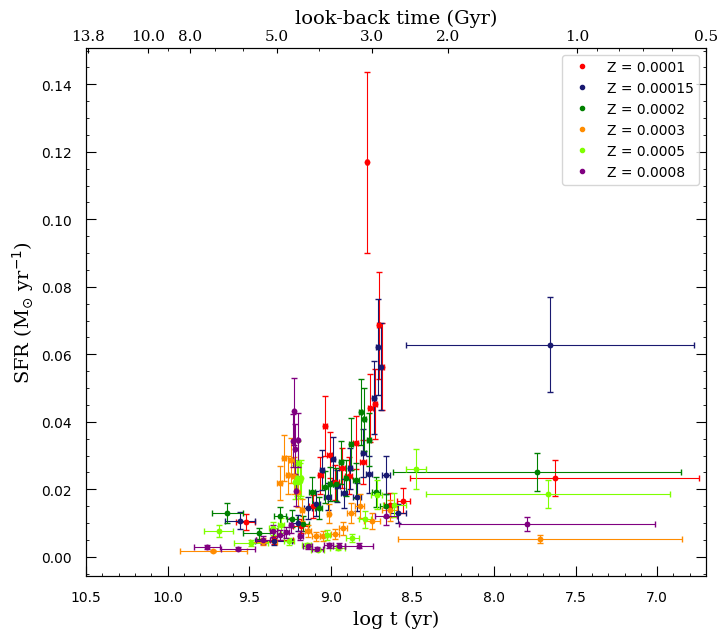

In [10]:
plt.figure(figsize = (8,7), dpi = 100)

plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
plt.ylabel('SFR (M$_{\odot}$ yr$^{-1}$)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.tick_params(axis='x', which='both', top=True, direction='in')
plt.tick_params(axis='y', which='both', right=True, direction='in')

plt.minorticks_on()

plt.xlim(10.5,6.7)

df_list_1 = df_list[0:number[0]]
metallicities_list_1 = metallicities_list[0:number[0]]

for i in range(len(colors[0:number[0]])):
  SFH_df = df_list_1[i]
  Z = metallicities_list_1[i]
  plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = colors[i] , label = 'Z = ' + str(Z))
  plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
              SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color= colors[i] , capsize=2.5, linewidth=0.8)

plt.legend()

###########################################
ax2 = plt.twiny()

ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlim(13.96,0.575)

ax2.set_xscale('log')

ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.set_xticks((13.8,10,8,5,3,2,1,0.5))
ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
###########################################


# plt.title('Field 1 - Without Using Probability Function', fontsize = 13)
plt.savefig('SFR_G1.jpeg', bbox_inches='tight', dpi = 400)

<ipython-input-11-5a2a8d985a1d>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")


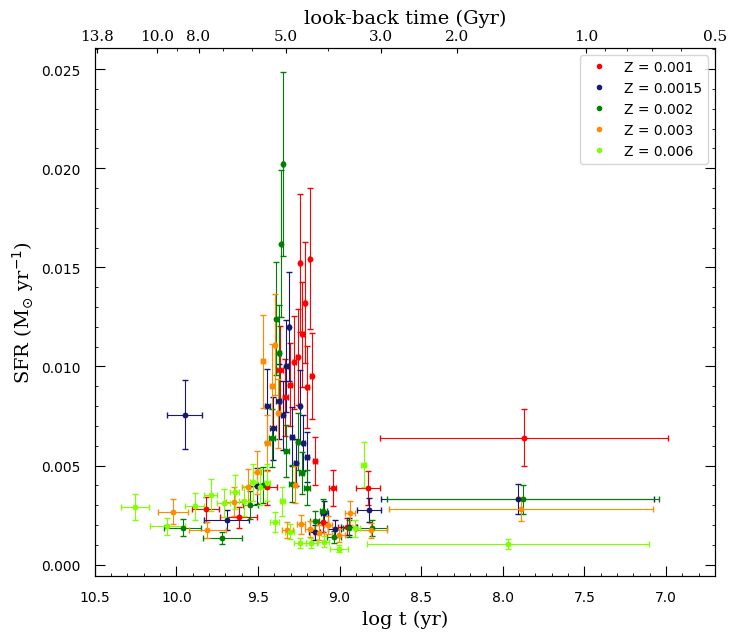

In [11]:
### SFR of Field1 - Z = 0.0001, 0.0003, 0.0005, 0.001, 0.003, 0.006

plt.figure(figsize = (8,7), dpi = 100)

plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
plt.ylabel('SFR (M$_{\odot}$ yr$^{-1}$)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.tick_params(axis='x', which='both', top=True, direction='in')
plt.tick_params(axis='y', which='both', right=True, direction='in')

plt.minorticks_on()


plt.xlim(10.5,6.7)

df_list_2 = df_list[number[0]:number[0]+number[1]]
metallicities_list_2 = metallicities_list[number[0]:number[0]+number[1]]

for i in range(len(colors[0:number[1]])):
  SFH_df = df_list_2[i]
  Z = metallicities_list_2[i]
  plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = colors[i] , label = 'Z = ' + str(Z))
  plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
              SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color= colors[i] , capsize=2.5, linewidth=0.8)

plt.legend()

###########################################
ax2 = plt.twiny()

ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlim(13.96,0.575)

ax2.set_xscale('log')

ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.set_xticks((13.8,10,8,5,3,2,1,0.5))
ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.3f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
###########################################


# plt.title('Field 1 - Without Using Probability Function', fontsize = 13)
plt.savefig('SFR_G2.jpeg', bbox_inches='tight', dpi = 400)

<ipython-input-12-4efb1410d6de>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")


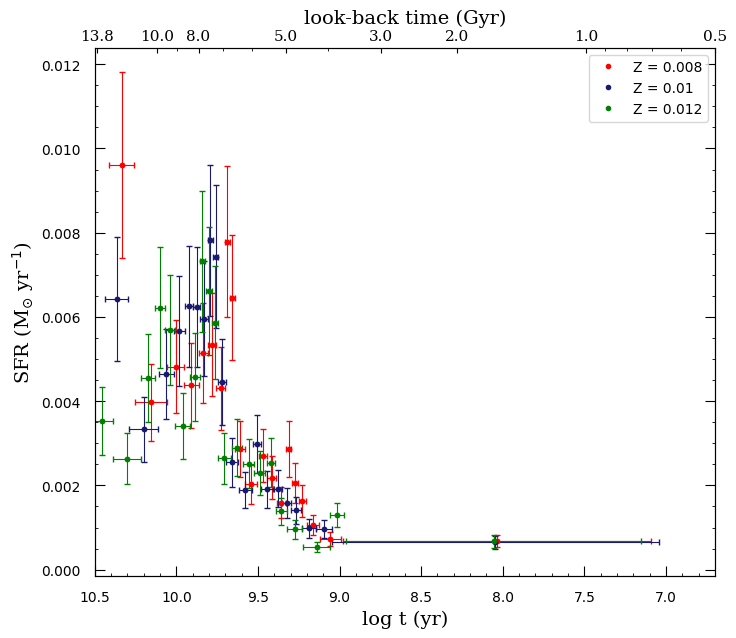

In [12]:
### SFR of Field1 - Z = 0.0001, 0.0003, 0.0005, 0.001, 0.003, 0.006

plt.figure(figsize = (8,7), dpi = 100)

plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
plt.ylabel('SFR (M$_{\odot}$ yr$^{-1}$)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.tick_params(axis='x', which='both', top=True, direction='in')
plt.tick_params(axis='y', which='both', right=True, direction='in')

plt.minorticks_on()


plt.xlim(10.5,6.7)

df_list_3 = df_list[-number[2]:]
metallicities_list_3 = metallicities_list[-number[2]:]

for i in range(len(colors[0:number[2]])):
  SFH_df = df_list_3[i]
  Z = metallicities_list_3[i]
  plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = colors[i] , label = 'Z = ' + str(Z))
  plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
              SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color= colors[i] , capsize=2.5, linewidth=0.8)

plt.legend()


###########################################
ax2 = plt.twiny()

ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlim(13.96,0.575)

ax2.set_xscale('log')

ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.set_xticks((13.8,10,8,5,3,2,1,0.5))
ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.3f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
###########################################


# plt.title('Field 1 - Without Using Probability Function', fontsize = 13)
plt.savefig('SFR_G3.jpeg', bbox_inches='tight', dpi = 400)